[nltk_data] Downloading package brown to /dev/null...
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/textblob/download_corpora.py", line 51, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/textblob/download_corpora.py", line 46, in main
    download_all()
  File "/usr/local/lib/python3.10/dist-packages/textblob/download_corpora.py", line 39, in download_all
    nltk.download(each)
  File "/usr/local/lib/python3.10/dist-packages/nltk/downloader.py", line 777, in download
    for msg in self.incr_download(info_or_id, download_dir, force):
  File "/usr/local/lib/python3.10/dist-packages/nltk/downloader.py", line 642, in incr_download
    yield from self._download_package(info, download_dir, force)
  File "/usr/local/lib/python

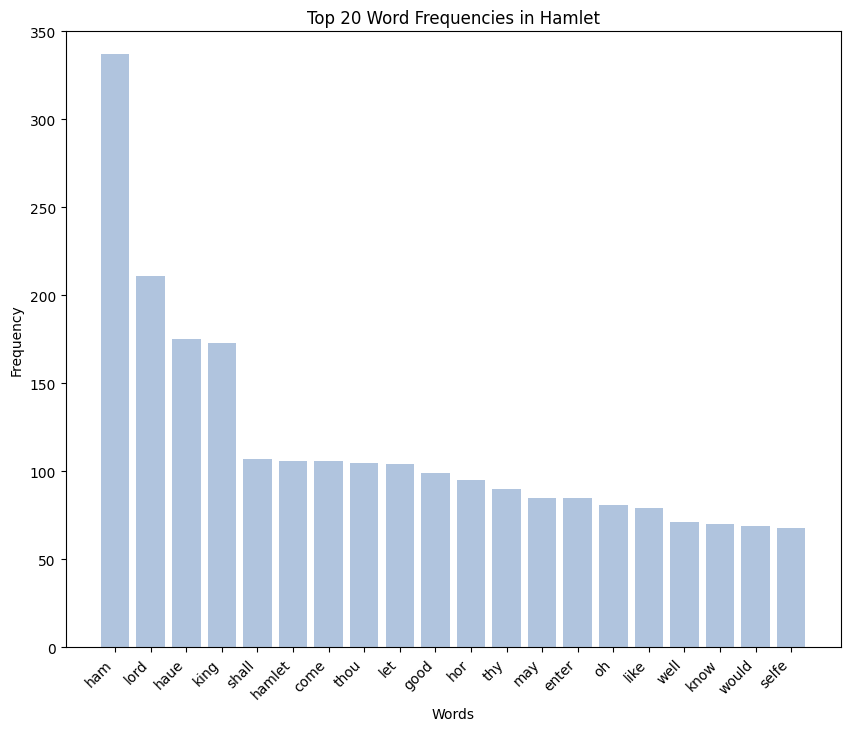

<ipython-input-22-ae22699e90bc>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


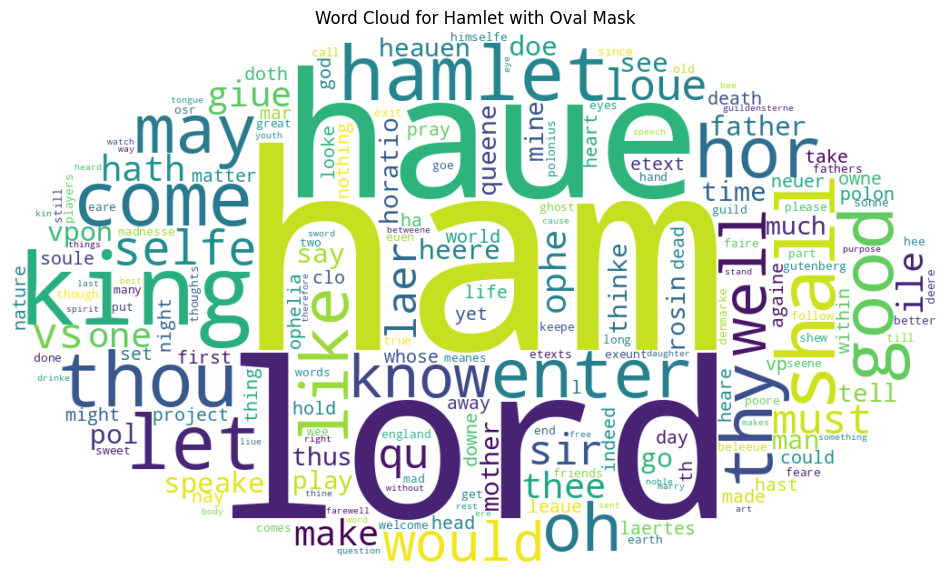

In [ ]:
import os
import nltk
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import imageio

os.environ['NLTK_DATA'] = '/dev/null'
!python -m textblob.download_corpora > /dev/null
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

blob = TextBlob(data)

words = blob.words
stopwords = nltk.corpus.stopwords.words('english')
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]

word_freq = Counter(filtered_words)

top_20_words = word_freq.most_common(20)

top_words, frequencies = zip(*top_20_words)

plt.figure(figsize=(10, 8))
plt.bar(top_words, frequencies, color='lightsteelblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequencies in Hamlet')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 350)
plt.show()

wordcloud_text = {word: freq for word, freq in word_freq.items()}

image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

wordcloud = WordCloud(background_color='white', mask=mask_image).generate_from_frequencies(wordcloud_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Hamlet with Oval Mask')
plt.show()
